Proyecto 2

Filtros sobre imágenes

Diplomado en Ciencia de Datos

Alumna: Andrea Morales González.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds


# Cargar el dataset
datos, info = tfds.load('kmnist', split=['train', 'test'], with_info=True, as_supervised=True)
train, test = datos

# Convertir a listas de numpy arrays
X_train_o, y_train = [], []
for imagen, etiqueta in tfds.as_numpy(train):
    X_train_o.append(imagen)
    y_train.append(etiqueta)

X_test_o, y_test = [], []
for imagen, etiqueta in tfds.as_numpy(test):
    X_test_o.append(imagen)
    y_test.append(etiqueta)

# Convertir listas a arrays numpy
X_train_o = np.array(X_train_o)
y_train = np.array(y_train)
X_test_o = np.array(X_test_o)
y_test = np.array(y_test)

print(X_train_o.shape, y_train.shape)
print(X_test_o.shape, y_test)

clases= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']



(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) [5 9 7 ... 8 5 7]


In [ ]:
X_train_o = X_train_o / 255
X_test_o = X_test_o / 255
X_train_o = X_train_o.squeeze()
X_test_o = X_test_o.squeeze()
print(X_train_o.shape)
print(X_test_o.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
Sobel_X = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


Gaussian = (1/16) * np.array([[1, 2, 1],
                              [2, 4, 2],
                              [1, 2, 1]])


Edge_Matrix = np.array([[ 0,  1,  0],
                        [ 1, -4,  1],
                        [ 0,  1,  0]])


Modelo

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential([
   layers.Flatten(input_shape=(28,28)),                                                     # pasa a vector
   layers.Dense(128, activation='relu'),
   layers.Dropout(0.2),
   layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train_o, y_train,
    epochs=10,
    batch_size = 128,
    validation_split = 0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 149s 7ms/step - accuracy: 0.7452 - loss: 8.6060 - val_accuracy: 0.8295 - val_loss: 1.0534
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7875 - loss: 1.1658 - val_accuracy: 0.8248 - val_loss: 0.8039
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8000 - loss: 0.9028 - val_accuracy: 0.8452 - val_loss: 0.7451
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8187 - loss: 0.7816 - val_accuracy: 0.8585 - val_loss: 0.6635
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8324 - loss: 0.7200 - val_accuracy: 0.8773 - val_loss: 0.5947
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8433 - loss: 0.6213 - val_accuracy: 0.8690 - val_loss: 0.5863
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8514 - loss: 0.5798 - val_accuracy: 0.8827 - val_loss: 0.6076
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8588 - loss: 0.5551 - val_accuracy

In [ ]:
from scipy.signal import convolve2d
train = []
for img in X_train_o:
  filtro = Sobel_X
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  train.append(img_filtrada)

X_train = np.array(train)

test = []
for img in X_test_o:
  filtro = Sobel_X
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  test.append(img_filtrada)

X_test = np.array(test)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size = 128,
    validation_split = 0.1,
    verbose=0
)

print(min(history.history["val_loss"]))
print(max(history.history["val_accuracy"]))

0.20656874775886536
0.9398333430290222


In [ ]:
from scipy.signal import convolve2d
train = []
for img in X_train_o:
  filtro = Edge_Matrix
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  train.append(img_filtrada)

X_train = np.array(train)

test = []
for img in X_test:
  filtro = Edge_Matrix
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  test.append(img_filtrada)

X_test = np.array(test)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size = 128,
    validation_split = 0.1,
    verbose=0
)

print(min(history.history["val_loss"]))
print(max(history.history["val_accuracy"]))

0.5149803757667542
0.8426666855812073


In [ ]:
from scipy.signal import convolve2d
train = []
for img in X_train_o:
  filtro = Gaussian
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  train.append(img_filtrada)

X_train = np.array(train)

test = []
for img in X_test_o:
  filtro = Gaussian
  img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
  test.append(img_filtrada)

X_test = np.array(test)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size = 128,
    validation_split = 0.1,
    verbose=0
)

print(min(history.history["val_loss"]))
print(max(history.history["val_accuracy"]))

0.2273755669593811
0.9350000023841858


In [ ]:
predic = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


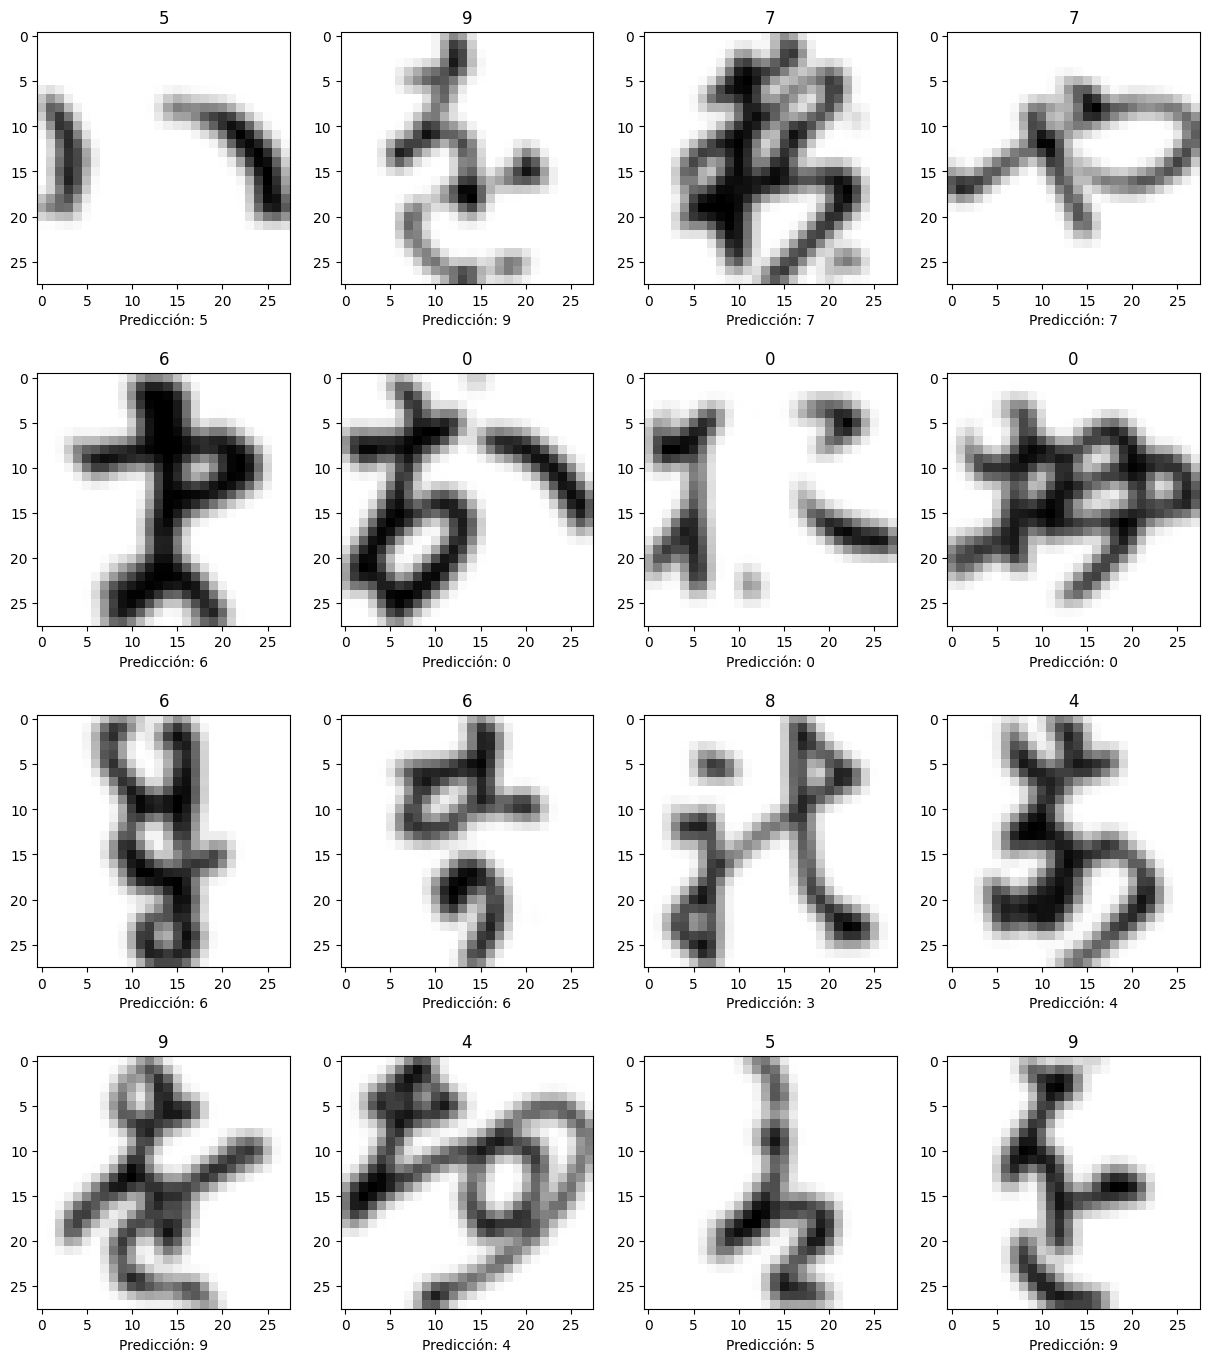

In [ ]:
plt.figure(figsize=(15, 17))
plt.subplot(4, 4, 1)
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.xlabel('Predicción: ' + clases[np.argmax(predic[0])])
plt.title(clases[y_test[0]])

for i in range(15):
    plt.subplot(4, 4, i+2)
    plt.imshow(X_test[i+1], cmap=plt.cm.binary)
    plt.xlabel('Predicción: ' + clases[np.argmax(predic[i+1])])
    plt.title(clases[y_test[i+1]])

plt.show()

Es facil ver que los filtros que dan mejor precisión al modelo son el *Gaussiano* y *Sobel_X* .

**Justificación:**
La base de datos utilizada 'kmnist' tiene muchos trazos finos y detalles en los caracteres japoneses.

El filtro Gaussiano atenúa esos trazos y permite que el modelo se enfoque en la estructura  del carácter y no en imperfecciones, es decir, suaviza la imagen  haciendo que el modelo aprenda patrones más generales.

El filtro Sobel X detecta bordes verticales en la imagen y esto ayuda a identificar mejor los caracteres con líneas verticales. Sin embargo, el filtro Gaussiano da mejores resultados, posiblemente porque Sobel X también puede borrar detalles importantes como la intensidad.